In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

Housing Price Data

In [2]:
link = '/content/drive/MyDrive/Kaggle/Housing.csv'

In [169]:
df = pd.read_csv(link)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [159]:
df['price'].describe().apply(lambda x: '{:,.2f}'.format(x))

count           545.00
mean      4,766,729.25
std       1,870,439.62
min       1,750,000.00
25%       3,430,000.00
50%       4,340,000.00
75%       5,740,000.00
max      13,300,000.00
Name: price, dtype: object

Convert to binary/onehotencoding

In [5]:
change = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
columns_to_drop = change + ['furnishingstatus']

In [6]:
to_binary = df[change].apply(lambda x : x.map({'yes': 1, 'no': 0}))
to_onehotencoding = pd.get_dummies(df.furnishingstatus)

In [7]:
newdf = df.drop(columns=columns_to_drop)
df2 = newdf.join([to_binary,to_onehotencoding])

Correlations between features

<Axes: >

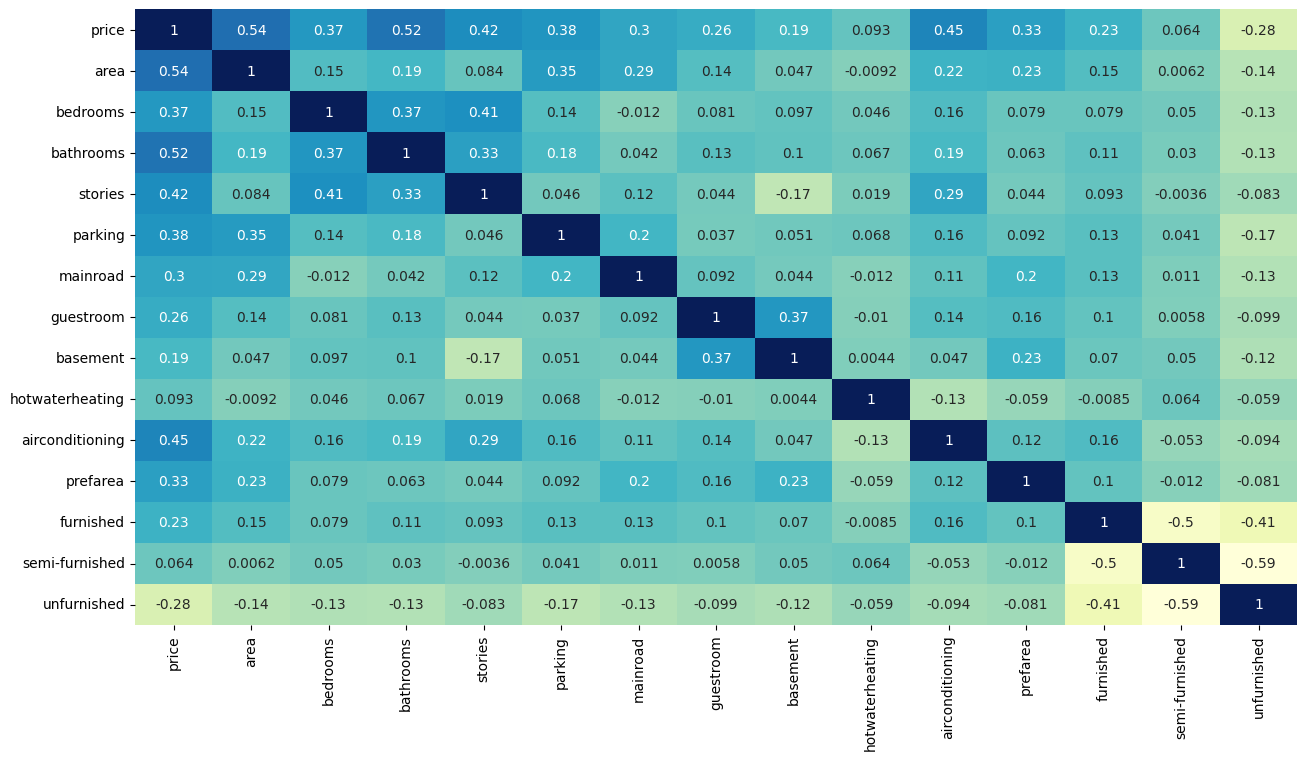

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(df2.corr(),annot=True,cmap='YlGnBu',cbar=False)

<Axes: xlabel='prefarea', ylabel='price'>

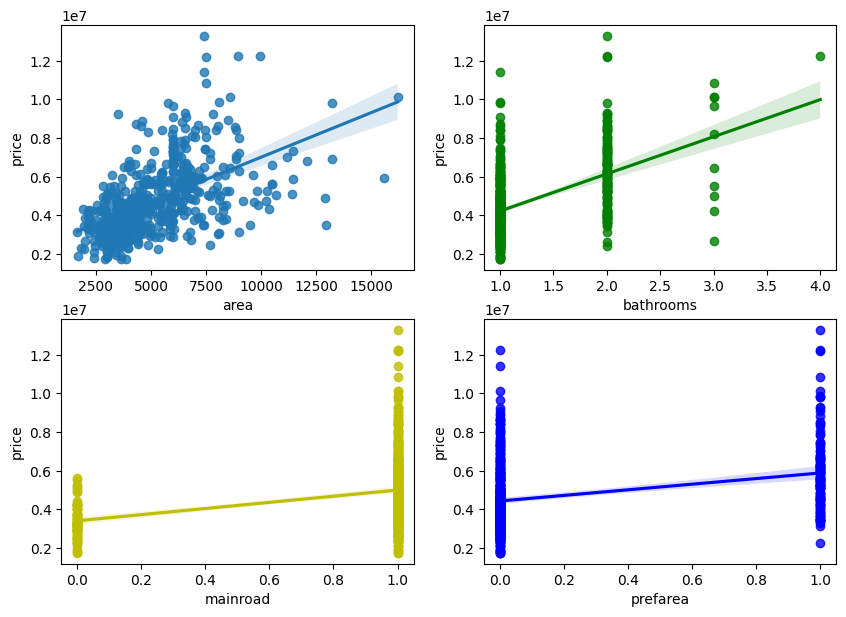

In [141]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,7))
sns.regplot(x='area',y='price',data=df2,scatter=True,fit_reg=True,ax = ax1)
sns.regplot(x='bathrooms',y='price',data=df2,scatter=True,fit_reg=True,color='g',ax = ax2)
sns.regplot(x='mainroad',y='price',data=df2,scatter=True,fit_reg=True,color='y', ax = ax3)
sns.regplot(x='prefarea',y='price',data=df2,scatter=True,fit_reg=True,color='b', ax = ax4)

Train & Test Data

In [ ]:
df2_x = df2.drop('price',axis=1)
df2_y = df2['price']

x_train, x_test, y_train, y_test = train_test_split(df2_x,df2_y,test_size=0.2,random_state=42)

RandomForestRegressor

In [116]:
model = RandomForestRegressor()

model.fit(x_train,y_train)

model1 = model.score(x_test,y_test)

print (f'score {model1 * 100:.2f}%')

score 61.44%


XGBoost

In [162]:
model2 = XGBRegressor()

model.fit(x_train,y_train)

model2 = model.score(x_test,y_test)

print (f'score {model2 * 100:.2f}%')

score 62.09%


RandomForestRegressor with GridCV

In [165]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 4],
    'max_depth': [None, 4, 8]
}

grid_searchRFR = GridSearchCV(model, param_grid, cv=10,
                              scoring='neg_mean_squared_error',
                              return_train_score=True)

grid_searchRFR.fit(x_train, y_train)

best_estimator = grid_searchRFR.best_estimator_

model3 = best_estimator.score(x_test, y_test)

print (f'score {model3 * 100:.2f}%')

score 61.76%


XGBoost with GridCV

In [168]:
model2 = XGBRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'min_child_weight': [2, 4],
    'max_depth': [None, 4, 8]
}

grid_search = GridSearchCV(model2, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train, y_train)

best_estimator = grid_search.best_estimator_

# Calculate the score on the test set
model4_score = best_estimator.score(x_test, y_test)

# Print the score
print(f'Score: {model4_score * 100:.2f}%')

Score: 61.48%
